In [ ]:
# Bike Dataset

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [16]:

df = pd.read_csv("bike_details.csv")

In [17]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [18]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [20]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [21]:
#1 What is the range of selling prices in the dataset ?
price_range = df['selling_price'].max() - df['selling_price'].min()
print(" Range of Selling Prices:", price_range)

 Range of Selling Prices: 755000


In [22]:
#2 What is the median selling price for bikes in the dataset ?
median_selling_price = df['selling_price'].median()
print("Median Selling Price:", median_selling_price)

Median Selling Price: 45000.0


In [23]:
#3 What is the most common seller type ?
most_common_seller_type = df['seller_type'].mode()[0]
print("Most Common Seller Type:", most_common_seller_type)

Most Common Seller Type: Individual


In [26]:
#4 How many bikes have driven more than 50,000 kilometers ?
bikes_driven_above_50k = df[df['km_driven'] > 50000]
num_bikes_above_50k = len(bikes_driven_above_50k)
print("Number of Bikes Driven Above 50,000 km:", num_bikes_above_50k)


Number of Bikes Driven Above 50,000 km: 170


In [38]:
#5 What is the average km_driven value for each ownership type ?
average_km_driven_by_ownership = df.groupby('owner')['km_driven'].mean()
print("Average km_driven by Ownership Type:")
print(average_km_driven_by_ownership)

Average km_driven by Ownership Type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [39]:
#6 What proportion of bikes are from the year 2015 or older ?
bikes_from_recent_years = df[df['year'] >= 2015]
proportion_recent_years = len(bikes_from_recent_years) / len(df)
print("Proportion of Bikes from 2015 or Older:", proportion_recent_years)

Proportion of Bikes from 2015 or Older: 0.527803958529689


In [40]:
#7 What is the trend of missing values across the dataset ?
missing_values_trend = df.isnull().sum() / len(df)
print("Trend of Missing Values:")
print(missing_values_trend)

Trend of Missing Values:
name                 0.000000
selling_price        0.000000
year                 0.000000
seller_type          0.000000
owner                0.000000
km_driven            0.000000
ex_showroom_price    0.409991
dtype: float64


In [41]:
#8 What is the highest ex_showroom_price recorded, and for which bike ?
highest_ex_showroom_price = df['ex_showroom_price'].max()
bike_with_highest_price = df[df['ex_showroom_price'] == highest_ex_showroom_price]
print("Highest Ex-Showroom Price:", highest_ex_showroom_price)
print("Bike with Highest Ex-Showroom Price:")
print(bike_with_highest_price)

Highest Ex-Showroom Price: 1278000.0
Bike with Highest Ex-Showroom Price:
                           name  selling_price  year seller_type      owner  \
134  Harley-Davidson Street Bob         750000  2013  Individual  2nd owner   

     km_driven  ex_showroom_price  
134      12000          1278000.0  


In [42]:
#9 What is the total number of bikes listed by each seller type ?
total_bikes_by_seller_type = df['seller_type'].value_counts()
print("Total Number of Bikes Listed by Seller Type:")
print(total_bikes_by_seller_type)

Total Number of Bikes Listed by Seller Type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


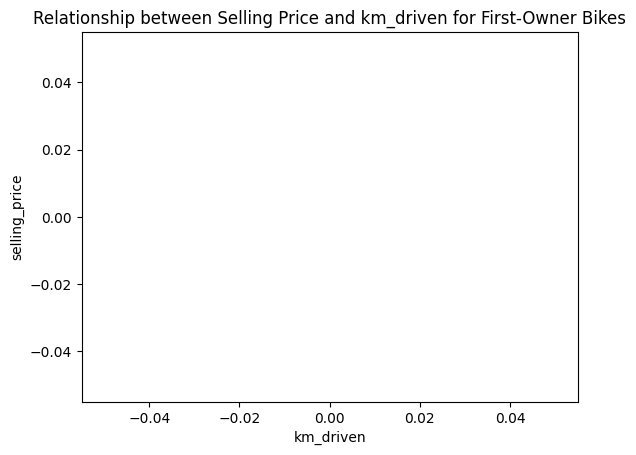

In [50]:
#10 What is the relationship between selling_price and km_driven for first-owner bikes ?
first_owner_bikes = df[df['owner'] == 'First Owner']
selling_price_vs_km_driven = first_owner_bikes.plot(kind='scatter', x='km_driven', y='selling_price', title='Relationship between Selling Price and km_driven for First-Owner Bikes')
plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.show()



In [44]:
#11 Identify and remove outliers in the km_driven column using the IQR method ?
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]
df_without_outliers = df.drop(outliers.index)
print("Outliers in km_driven:")
print(outliers)
print("DataFrame without Outliers:")
print(df_without_outliers)


Outliers in km_driven:
                                 name  selling_price  year seller_type  \
91           Honda Activa [2000-2015]          22989  2012  Individual   
93                      Suzuki GS150R          30000  2010  Individual   
115           Hero Honda Passion Plus           7500  2004  Individual   
135            Hero Honda CBZ extreme          20000  2007  Individual   
154                Hero Xtreme Sports          22000  2014  Individual   
184              Honda CB Unicorn 160          75000  2015  Individual   
363                Hero Honda CD100SS          10000  1997  Individual   
470          Honda Activa [2000-2015]          23000  2009  Individual   
474     Hero Honda Passion PRO [2012]          12000  2012  Individual   
477          Honda Activa [2000-2015]          25000  2009  Individual   
511                Hero Splendor Plus          12000  2007  Individual   
535              Hero Honda CD Deluxe          12000  2007  Individual   
548            

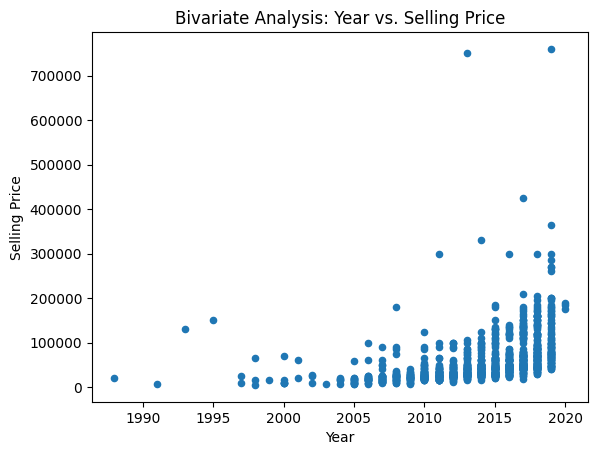

In [45]:
#12 Perform a bivariate analysis to visualize the relationship between year and selling_price ?
bivariate_analysis = df.plot(kind='scatter', x='year', y='selling_price', title='Bivariate Analysis: Year vs. Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

In [46]:
#13 What is the average depreciation in selling price based on the bike's age (current year - manufacturing year) ?
current_year = 2023
df['age'] = current_year - df['year']
df['depreciation'] = df['selling_price'] - df['ex_showroom_price']
average_depreciation_by_age = df.groupby('age')['depreciation'].mean()
print("Average Depreciation in Selling Price by Bike Age:")
print(average_depreciation_by_age)

Average Depreciation in Selling Price by Bike Age:
age
3     34260.000000
4     -2954.562500
5    -13023.194805
6    -22306.082353
7    -28328.190476
8    -28013.275000
9    -34505.606061
10   -43086.886792
11   -37317.648649
12   -47102.666667
13   -45658.928571
14   -38227.785714
15   -54732.428571
16   -42399.000000
17   -39664.500000
18   -44852.000000
19   -36852.000000
20             NaN
21             NaN
22   -34852.000000
23             NaN
24             NaN
25             NaN
26             NaN
28             NaN
30             NaN
32             NaN
35             NaN
Name: depreciation, dtype: float64


In [48]:
#14 Which bike names are priced significantly above the average price for their manufacturing year ?
average_price_by_year = df.groupby('year')['selling_price'].mean
df['average_price_year'] = df.groupby('year')['selling_price'].transform('mean')
significant_priced_bikes = df[df['selling_price'] > df['average_price_year']]
print("Bike Names Priced Above Average for Their Manufacturing Year:")
print(significant_priced_bikes['name'])


Bike Names Priced Above Average for Their Manufacturing Year:
0                  Royal Enfield Classic 350
2        Royal Enfield Classic Gunmetal Grey
3          Yamaha Fazer FI V 2.0 [2016-2018]
7       Royal Enfield Bullet 350 [2007-2011]
13                             Yamaha YZF R3
                        ...                 
1004                    Bajaj Pulsar  NS 200
1005                      TVS Apache RTR 160
1008                      Bajaj Pulsar 220 F
1012                     Bajaj Pulsar NS 200
1023                  Bajaj Avenger 220 dtsi
Name: name, Length: 334, dtype: object


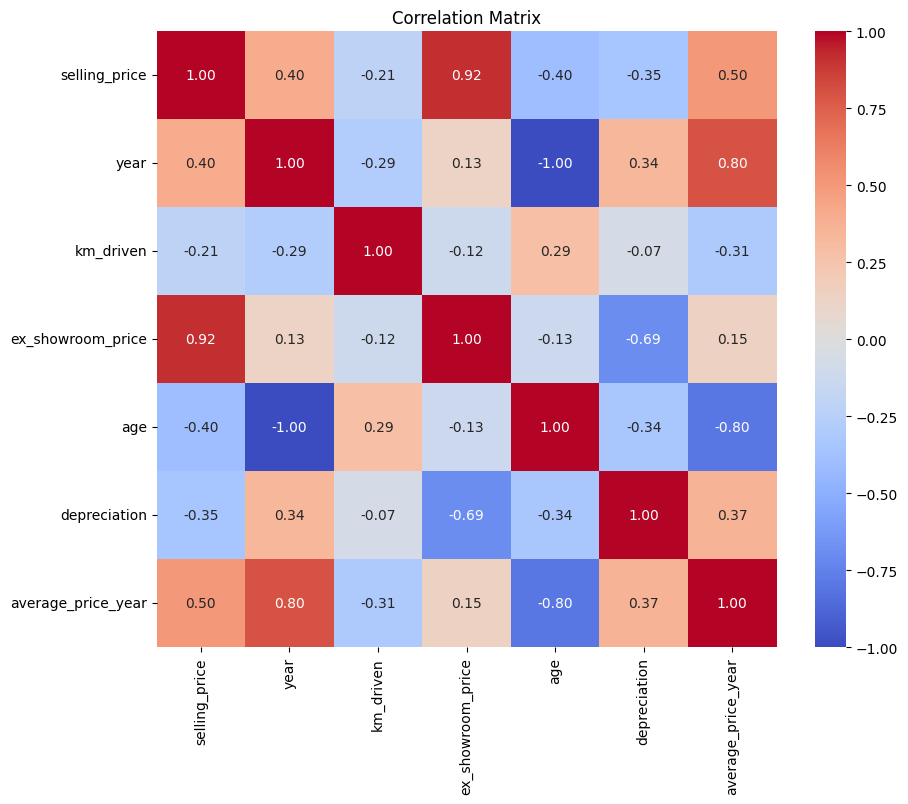

In [49]:
#15 Develop a correlation matrix for numeric columns and visualize it using a heatmap ?
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [51]:
# Car Sales Dataset

In [53]:
df1 = pd.read_csv("car_sale.csv")

In [54]:
df1

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [55]:
df1.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [57]:
df1.size

382496

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                1061 non-null   object 
 1   selling_price       1061 non-null   int64  
 2   year                1061 non-null   int64  
 3   seller_type         1061 non-null   object 
 4   owner               1061 non-null   object 
 5   km_driven           1061 non-null   int64  
 6   ex_showroom_price   626 non-null    float64
 7   age                 1061 non-null   int64  
 8   depreciation        626 non-null    float64
 9   average_price_year  1061 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 83.0+ KB


In [87]:
#1 What is the average selling price of cars for each dealer, and how does it compare across different dealers ?
df1.groupby("Dealer_Name")["Price ($)"].mean()

,Price ($)
Dealer_Name,
Buddy Storbeck's Diesel Service Inc,27217.261563
C & M Motors Inc,28111.755200
Capitol KIA,28189.703822
Chrysler Plymouth,27555.526400
Chrysler of Tri-Cities,28123.091054
Classic Chevy,28602.014446
Clay Johnson Auto Sales,27816.027113
Diehl Motor CO Inc,27993.929487
Enterprise Rent A Car,28312.580800


In [90]:
#2 Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends ?
price_variation = df1.groupby("Company")["Price ($)"].std()

highest_variation_brand = price_variation.idxmax()
highest_variation_value = price_variation.max()

print(f"{highest_variation_brand} has the highest price variation with a standard deviation of ${highest_variation_value:.2f}.")

Lincoln has the highest price variation with a standard deviation of $19658.05.


In [91]:
#3 What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare ?
transmission_price_distribution = df1.groupby("Transmission")["Price ($)"].describe()
print(transmission_price_distribution)

                count          mean           std     min      25%      50%  \
Transmission                                                                  
Auto          12571.0  28248.525972  13747.070597  1200.0  19000.0  24000.0   
Manual        11335.0  27914.710631  15862.871978  1700.0  17000.0  22001.0   

                  75%      max  
Transmission                    
Auto          35500.0  75700.0  
Manual        34000.0  85800.0  


In [93]:
#4 What is the distribution of car prices across different regions ?
region_price_distribution = df1.groupby("Dealer_Region")["Price ($)"].describe()
print(region_price_distribution)

                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco          34000.0  85600.0  
Scottsdale     3

In [97]:
#5 What is the distribution of cars based on body styles ?
body_style_distribution = df1["Body Style"].value_counts()
print(body_style_distribution)

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


In [99]:
#6 How does the average selling price of cars vary by customer gender and annual income ?
df1.groupby(["Gender", "Annual Income"])["Price ($)"].mean()

Gender  Annual Income
Female  13500            28132.038732
        106000           46001.000000
        121000           20000.000000
        190000           19001.000000
        211000           51000.000000
                             ...     
Male    6600000          39000.000000
        6800000          15000.000000
        7650000          21000.000000
        8000000          85000.000000
        11200000         26001.000000
Name: Price ($), Length: 3442, dtype: float64

In [100]:
#7 What is the distribution of car prices by region, and how does the number of cars sold vary by region ?
region_price_distribution = df1.groupby("Dealer_Region")["Price ($)"].describe()
print(region_price_distribution)

                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco          34000.0  85600.0  
Scottsdale     3

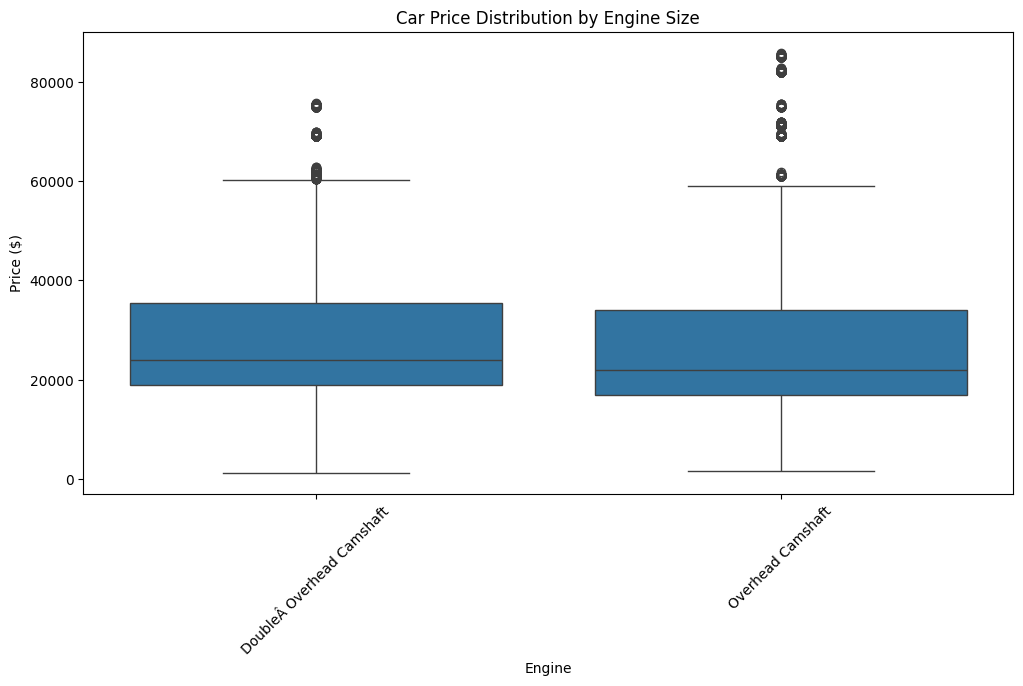

In [103]:
#8 How does the average car price differ between cars with different engine sizes ?
plt.figure(figsize=(12, 6))
sns.boxplot(x="Engine", y="Price ($)", data=df1)
plt.xticks(rotation=45)
plt.title("Car Price Distribution by Engine Size")
plt.show()

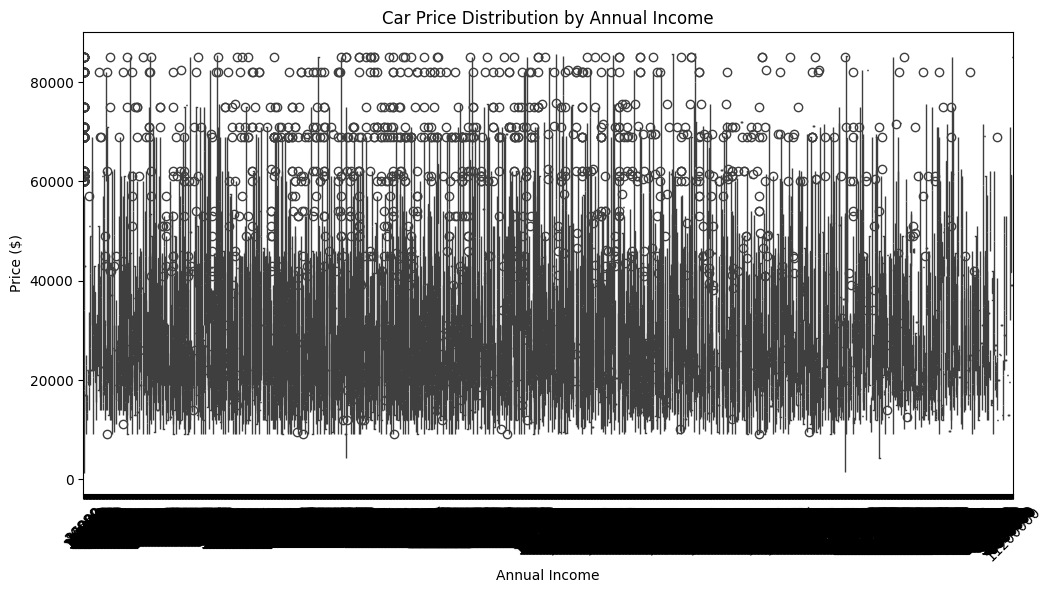

In [104]:
#9 How do car prices vary based on the customer’s annual income bracket ?
plt.figure(figsize=(12, 6))
sns.boxplot(x="Annual Income", y="Price ($)", data=df1)
plt.xticks(rotation=45)
plt.title("Car Price Distribution by Annual Income")
plt.show()

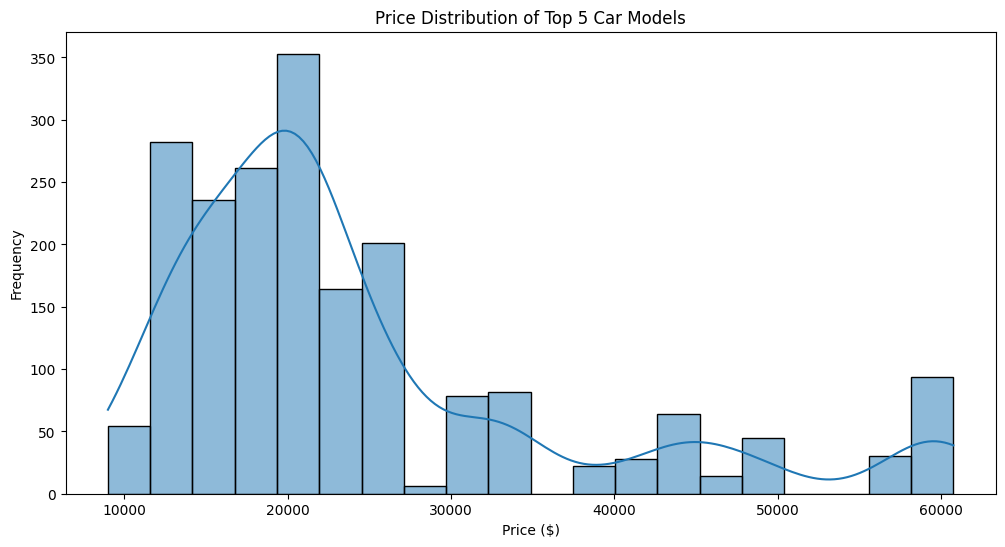

In [109]:
#10 What are the top 5 car models with the highest number of sales, and how does their price distribution look ?
top_5_models = df1["Model"].value_counts().head(5)
top_5_models_prices = df1[df1["Model"].isin(top_5_models.index)]["Price ($)"]
plt.figure(figsize=(12, 6))
sns.histplot(top_5_models_prices, bins=20, kde=True)
plt.title("Price Distribution of Top 5 Car Models")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()


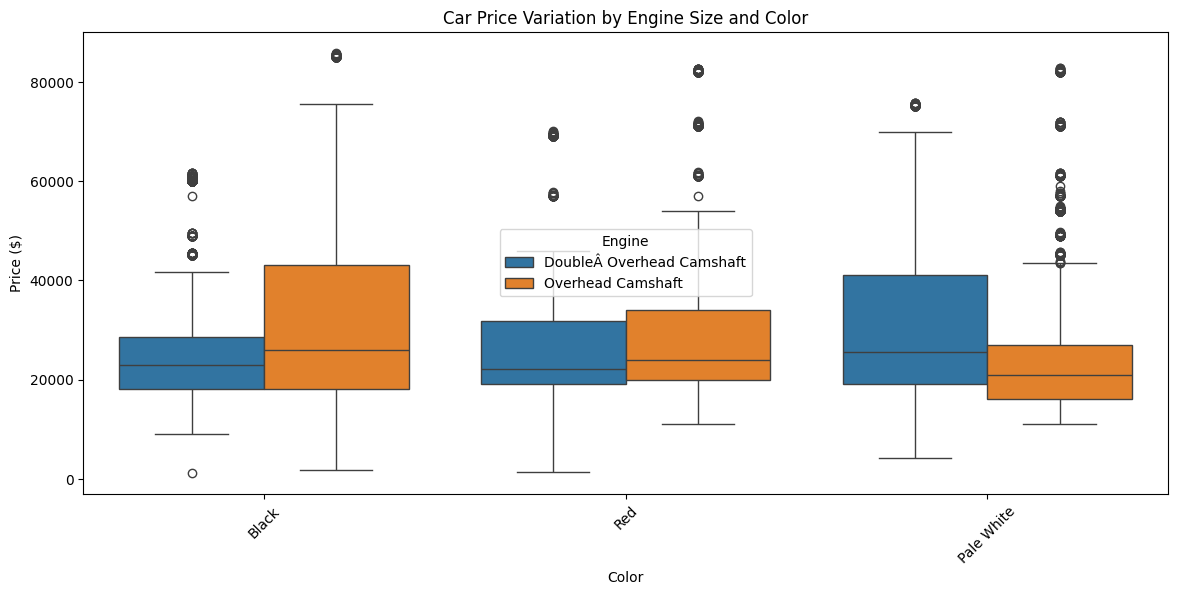

In [110]:
#11 How does car price vary with engine size across different car colors, and which colors have the highest price variation?
plt.figure(figsize=(14, 6))
sns.boxplot(x="Color", y="Price ($)", hue="Engine", data=df1)
plt.xticks(rotation=45)
plt.title("Car Price Variation by Engine Size and Color")
plt.show()


In [112]:
#12 Is there any seasonal trend in car sales based on the date of sale?
df1["Date"] = pd.to_datetime(df1["Date"])
df1["Month"] = df1["Date"].dt.month
monthly_sales = df1["Month"].value_counts().sort_index()
print(monthly_sales)

Month
1      790
2      735
3     1535
4     1655
5     1895
6     1715
7     1725
8     1705
9     3305
10    1830
11    3470
12    3546
Name: count, dtype: int64


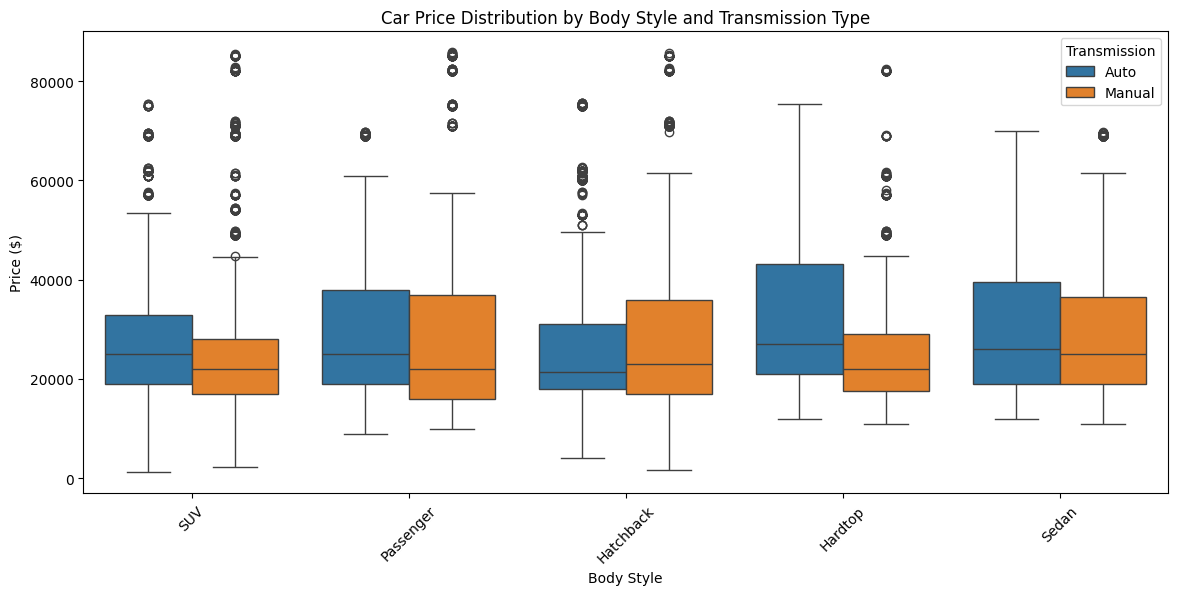

In [113]:
#13 How does the car price distribution change when considering different combinations of body style and transmission type?
plt.figure(figsize=(14, 6))
sns.boxplot(x="Body Style", y="Price ($)", hue="Transmission", data=df1)
plt.xticks(rotation=45)
plt.title("Car Price Distribution by Body Style and Transmission Type")
plt.show()

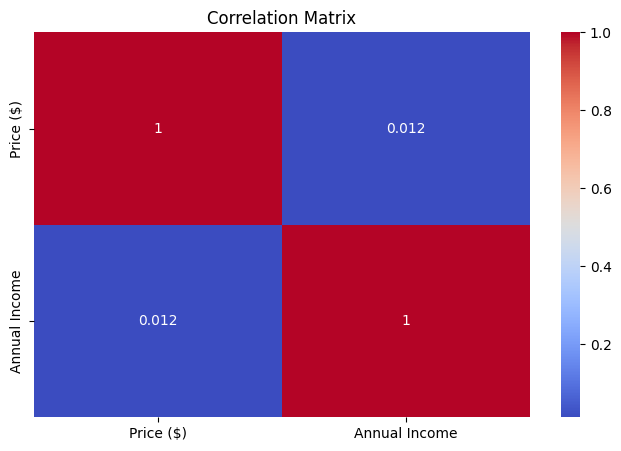

In [114]:
#14 What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
plt.figure(figsize=(8, 5))
sns.heatmap(df1[["Price ($)", "Annual Income"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [115]:
#15 How does the average car price vary across different car models and engine types?
avg_price_model_engine = df1.groupby(["Model", "Engine"])["Price ($)"].mean()
print(avg_price_model_engine)

Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.380117
3000GT    DoubleÂ Overhead Camshaft    22764.326923
          Overhead Camshaft            21770.659864
300M      DoubleÂ Overhead Camshaft    21394.888889
323i      DoubleÂ Overhead Camshaft    16744.632287
                                           ...     
Windstar  Overhead Camshaft            17100.272727
Wrangler  DoubleÂ Overhead Camshaft    21145.294737
          Overhead Camshaft            18742.942029
Xterra    DoubleÂ Overhead Camshaft    15940.459459
          Overhead Camshaft            31072.500000
Name: Price ($), Length: 261, dtype: float64


In [116]:
# Data Set 3


In [117]:
df3 = pd.read_csv("amazon.csv")

In [132]:
# Convert numeric columns to proper data types
df3["rating"] = pd.to_numeric(df3["rating"], errors='coerce')
df3["rating_count"] = pd.to_numeric(df3["rating_count"], errors='coerce')
df3["discounted_price"] = pd.to_numeric(df3["discounted_price"], errors='coerce')
df3["actual_price"] = pd.to_numeric(df3["actual_price"], errors='coerce')
df3["discount_percentage"] = pd.to_numeric(df3["discount_percentage"], errors='coerce')


In [133]:
df3

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,NaN,4.2,NaN,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,NaN,4.0,NaN,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,NaN,3.9,NaN,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,NaN,4.2,NaN,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,NaN,4.2,NaN,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,NaN,NaN,NaN,4.0,NaN,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,NaN,NaN,NaN,4.1,NaN,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,

In [134]:
df3.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,NaN,4.2,NaN,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,NaN,4.0,NaN,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,NaN,3.9,NaN,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,NaN,4.2,NaN,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,NaN,4.2,NaN,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [135]:
df3.tail()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,NaN,NaN,NaN,4.0,NaN,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,NaN,NaN,NaN,4.1,NaN,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",NaN,NaN,NaN,3.6,468.0,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",NaN,NaN,NaN,4.0,NaN,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...","Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Havells-Ventilair-230mm-...
1464,B01486F4G6,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,NaN,NaN,NaN,4.3,NaN,"Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...","AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...","Rajib,Ajay B,Vikas Kahol,PARDEEP,Anindya Prama...","R20RBRZ0WEUJT9,ROKIFK9R2ISSE,R30EEG2FNJSN5I,R2...","Works perfect,Ok good product,Nice Product. Re...",It does it job perfectly..only issue is temp c...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...


In [136]:
df3.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,0.0,0.0,0.0,1464.000000,326.000000
mean,NaN,NaN,NaN,4.096585,348.217791
std,NaN,NaN,NaN,0.291674,268.041590
min,NaN,NaN,NaN,2.000000,2.000000
25%,NaN,NaN,NaN,4.000000,119.000000
50%,NaN,NaN,NaN,4.100000,293.000000
75%,NaN,NaN,NaN,4.300000,544.000000
max,NaN,NaN,NaN,5.000000,992.000000


In [137]:
#1 What is the average rating for each product category ?
avg_rating_per_category = df3.groupby("category")["rating"].mean()
print(avg_rating_per_category)

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSu

In [138]:
# 2. What are the top rating_count products by category?
top_rated_products = df3.groupby("category").apply(lambda x: x.nlargest(5, "rating_count"))
print(top_rated_products)

                                                         product_id  \
category                                                              
Car&Motorbike|CarAccessories|InteriorAccessorie... 1157  B0912WJ87V   
Computers&Accessories|Accessories&Peripherals|A... 695   B097C564GC   
                                                   742   B094DQWV9B   
Computers&Accessories|Accessories&Peripherals|A... 906   B009LJ2BXA   
Computers&Accessories|Accessories&Peripherals|A... 748   B08SCCG9D4   
...                                                             ...   
OfficeProducts|OfficePaperProducts|Paper|Statio... 858   B00LOD70SC   
OfficeProducts|OfficePaperProducts|Paper|Statio... 850   B07SBGFDX9   
                                                   919   B00LZPQVMK   
                                                   955   B0746N6WML   
Toys&Games|Arts&Crafts|Drawing&PaintingSupplies... 924   B00DJ5N9VK   

                                                                            

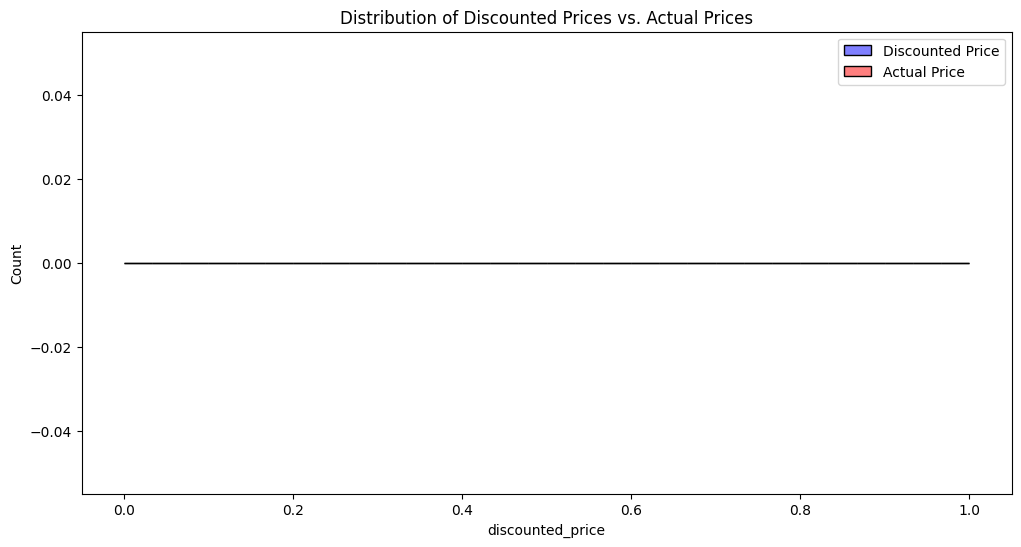

In [139]:
# 3. What is the distribution of discounted prices vs. actual prices?
plt.figure(figsize=(12, 6))
sns.histplot(df3["discounted_price"], color="blue", label="Discounted Price", kde=True, bins=30)
sns.histplot(df3["actual_price"], color="red", label="Actual Price", kde=True, bins=30)
plt.legend()
plt.title("Distribution of Discounted Prices vs. Actual Prices")
plt.show()


In [140]:
# 4. How does the average discount percentage vary across categories?
avg_discount_per_category = df3.groupby("category")["discount_percentage"].mean()
print(avg_discount_per_category)


category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                   NaN
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                  NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                          NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                       NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                          NaN
                                                                                                                          ..
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens       NaN
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPen

In [141]:
# 5. What are the most popular product names?
popular_products = df3["product_name"].value_counts().head(10)
print(popular_products)


product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution             5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                      4
Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)    3
MI Braided USB Type-C Cable for Charging Adapter (Red)                                                                                                                3
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                       3
Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Battery | Upto 12GB RAM with RAM Plus                                             

In [142]:
# 6. What are the most popular product keywords?
from collections import Counter
import itertools

keywords = df3["product_name"].str.lower().str.split()
all_keywords = list(itertools.chain(*keywords))
keyword_counts = Counter(all_keywords)
print(keyword_counts.most_common(10))


[('with', 751), ('for', 672), ('|', 457), ('&', 432), ('usb', 377), ('and', 330), ('cable', 320), ('-', 220), ('charging', 219), ('to', 218)]


In [143]:
# 7. What are the most popular product reviews?
popular_reviews = df3["review_content"].value_counts().head(10)
print(popular_reviews)


review_content
I am not big on camera usage, personally. I was even mentally prepared for a bad camera, based on some reviews here. But I was pleasantly surprised that camera clicks good photos. They are not awesome, but they are decent photos that can even be shared.Now coming to my biggest grouse; heating issue. The phone started heating up while charging, but it was just a little and so I could have ignored it. But then it started heating up more and got me very concerned. I even ordered a replacement thinking I got a defective piece. But then, after further tests, I found that it is heating more when I download huge amounts of data, for example, when I restore data of my old phone, from back up. This is ok with me as, I don't perform huge data loads regularly, definitely not on phone. Then I tested by running tasks I usually perform such as checking office mails, attending office meeting on phone, watching a video from Amazon Prime, and so on. The phone did not heat up even a littl

In [146]:
# 8. What is the correlation between discounted_price and rating?
correlation_price_rating = df3["discounted_price"].corr(df3["rating"])
print(correlation_price_rating)

nan


In [147]:
# 9. What are the Top 5 categories based on the highest ratings?
top_categories = avg_rating_per_category.sort_values(ascending=False).head(5)
print(top_categories)


category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64


In [148]:
# 10. Identify any potential areas for improvement or optimization based on the data analysis.
# This can involve finding products with high discounts but low ratings, indicating quality concerns.
low_rated_high_discount = df3[(df3["discount_percentage"] > df3["discount_percentage"].mean()) & (df3["rating"] < df3["rating"].mean())]
print(low_rated_high_discount)


Empty DataFrame
Columns: [product_id, product_name, category, discounted_price, actual_price, discount_percentage, rating, rating_count, about_product, user_id, user_name, review_id, review_title, review_content, img_link, product_link]
Index: []


In [149]:
# Dataset 4

In [150]:
df4 = pd.read_csv("spotify.csv")

In [151]:
df4

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [152]:
df4.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [153]:
df4.tail()

,Artist,Track Name,Popularity,Duration (ms),Track ID
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6
439,Rick Ross,Stay Schemin,68,267720,0nq6sfr8z1R5KJ4XUk396e


In [156]:
df4["Popularity"] = pd.to_numeric(df4["Popularity"], errors='coerce')
df4["Duration (ms)"] = pd.to_numeric(df4["Duration (ms)"], errors='coerce')

In [157]:
# 1. Read the dataframe, check null values, and check for duplicate rows
df4.info()
print("Null values:\n", df4.isnull().sum())
print("Duplicate rows:", df4.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB
Null values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Duplicate rows: 27


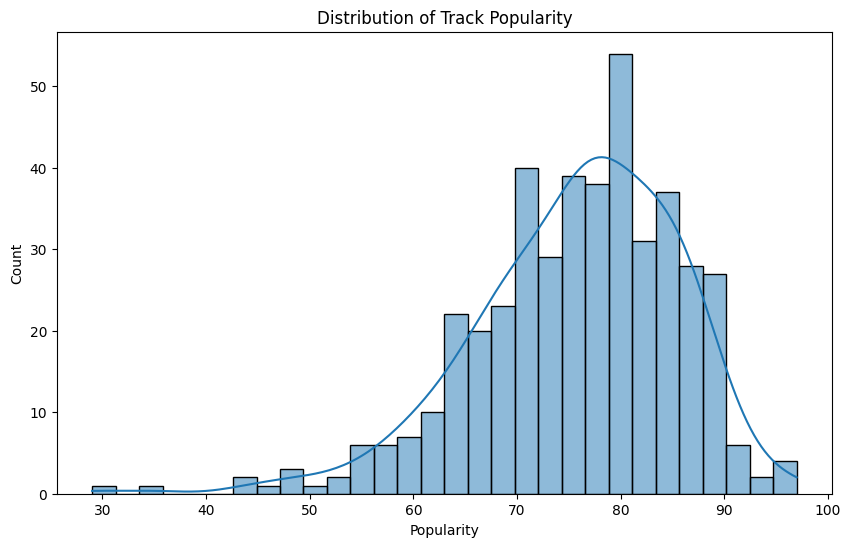

In [158]:
# 2. What is the distribution of Popularity among the tracks in the dataset? Visualize it using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df4["Popularity"], bins=30, kde=True)
plt.title("Distribution of Track Popularity")
plt.show()

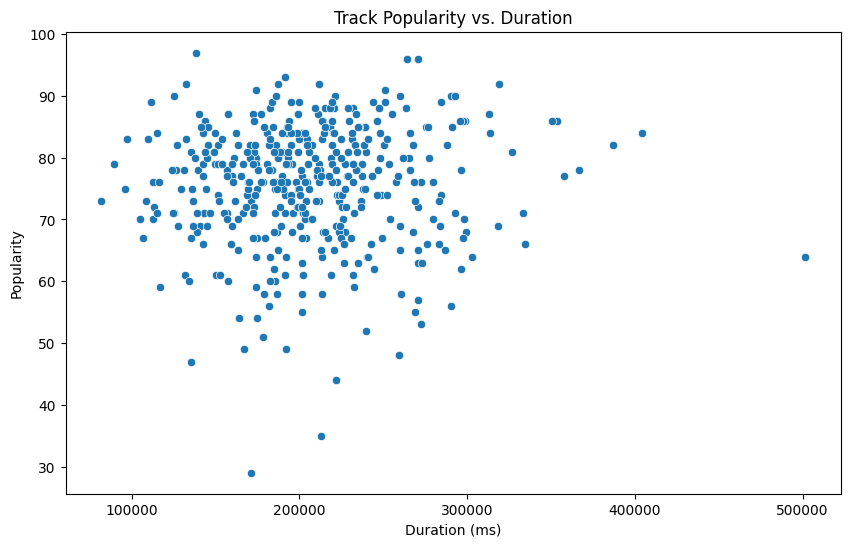

In [159]:
# 3. Is there any relationship between the Popularity and the duration of tracks? Explore using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df4["Duration (ms)"], y=df4["Popularity"])
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.title("Track Popularity vs. Duration")
plt.show()


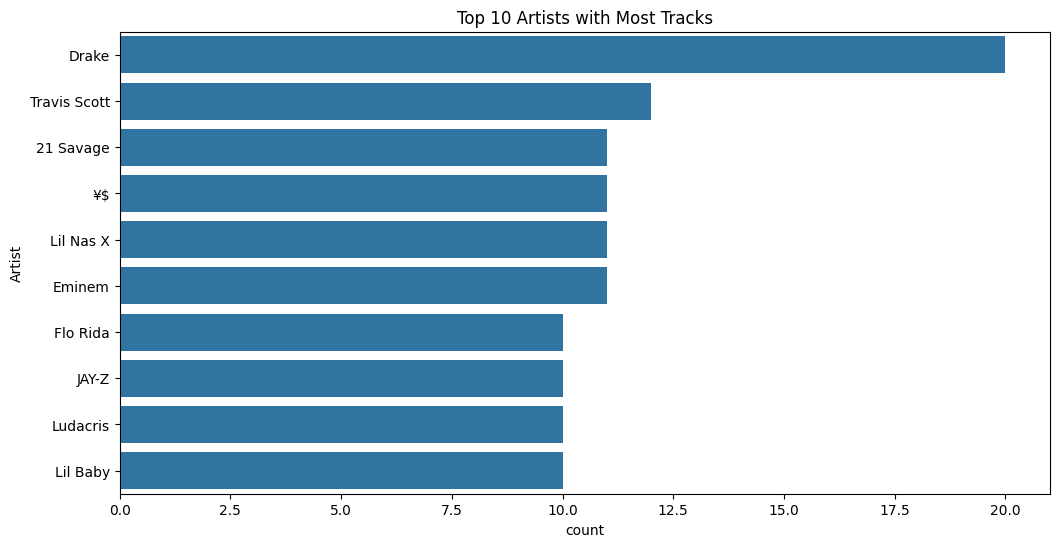

In [160]:
# 4. Which artist has the highest number of tracks in the dataset? Display count of tracks for each artist
plt.figure(figsize=(12, 6))
sns.countplot(y=df4["Artist"], order=df4["Artist"].value_counts().index[:10])
plt.title("Top 10 Artists with Most Tracks")
plt.show()


In [161]:
# 5. What are the top 5 least popular tracks in the dataset?
least_popular_tracks = df4.nsmallest(5, "Popularity")[["Artist", "Track Name", "Popularity"]]
print(least_popular_tracks)


             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
435  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47


In [162]:
# 6. Among the top 5 most popular artists, which artist has the highest Popularity on average?
top_artists = df4.groupby("Artist")["Popularity"].mean().nlargest(5)
print(top_artists)


Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    87.000000
¥$              86.090909
Name: Popularity, dtype: float64


In [163]:
# 7. For the top 5 most popular artists, what are their most popular tracks?
top_tracks_by_artist = df4[df4["Artist"].isin(top_artists.index)].groupby("Artist").apply(lambda x: x.nlargest(1, "Popularity"))[["Artist", "Track Name", "Popularity"]]
print(top_tracks_by_artist)


                        Artist                    Track Name  Popularity
Artist                                                                  
David Guetta 200  David Guetta            Baby Don't Hurt Me          87
Travis Scott 30   Travis Scott    FE!N (feat. Playboi Carti)          93
Trueno       241        Trueno  Mamichula - con Nicki Nicole          89
cassö        140         cassö                         Prada          92
¥$           260            ¥$                      CARNIVAL          96


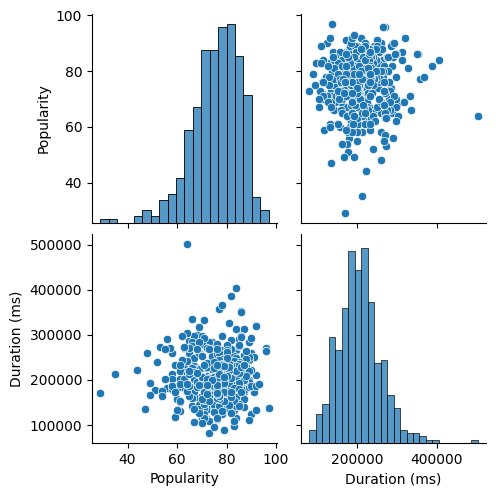

In [164]:
# 8. Visualize relationships between multiple numerical variables using a pair plot
sns.pairplot(df4[["Popularity", "Duration (ms)"]])
plt.show()


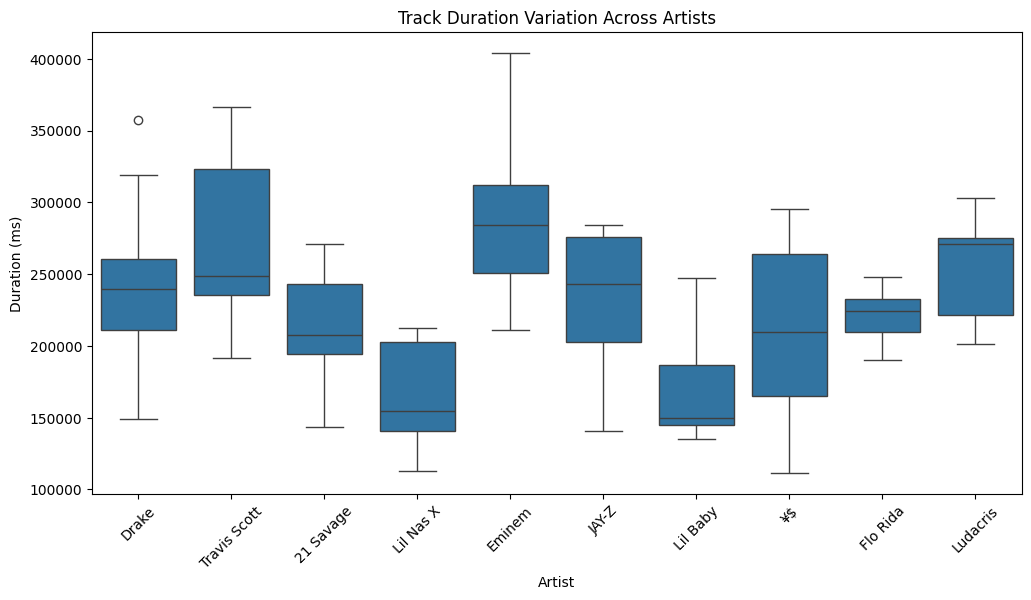

In [165]:
# 9. Does the duration of tracks vary significantly across different artists? Explore visually using a box plot
plt.figure(figsize=(12, 6))
top_artists_list = df4["Artist"].value_counts().index[:10]
sns.boxplot(x="Artist", y="Duration (ms)", data=df4[df4["Artist"].isin(top_artists_list)])
plt.xticks(rotation=45)
plt.title("Track Duration Variation Across Artists")
plt.show()


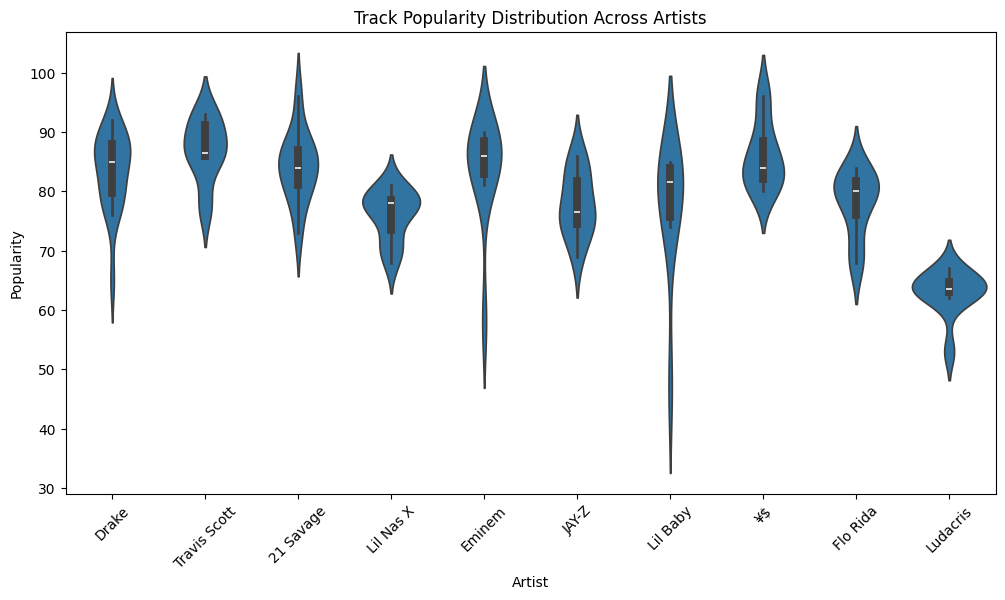

In [166]:
# 10. How does the distribution of track Popularity vary for different artists? Visualize using a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x="Artist", y="Popularity", data=df4[df4["Artist"].isin(top_artists_list)])
plt.xticks(rotation=45)
plt.title("Track Popularity Distribution Across Artists")
plt.show()
